# Bangla Handwritten Digits Recognition
Using With Shallow Nural Network

*Dataset Source: [Bengali.ai](https://bengali.ai/)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
# Loading the dataset
X_train = pd.read_json('./dataset/train_images.json', ' ').to_numpy().T
Y_train = pd.read_json('./dataset/train_labels.json', ' ').to_numpy()
X_test = pd.read_json('./dataset/test_images.json', ' ').to_numpy().T
Y_test = pd.read_json('./dataset/test_labels.json', ' ').to_numpy()

# Setting up the label
ohe_y = OneHotEncoder()
Y_train = ohe_y.fit_transform(Y_train).toarray().T
Y_test = ohe_y.fit_transform(Y_test).toarray().T

# Checking the shape of the dataset
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Normalizing the dataset
X_test = X_test / 255
X_train = X_train / 255

(784, 23824)
(10, 23824)
(784, 2653)
(10, 2653)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


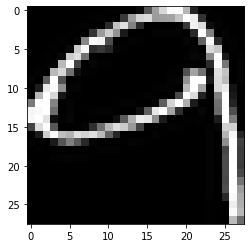

In [3]:
# Checking up some data
index = 123
temp_x_data = X_train.T[index].reshape(28, 28)
temp_y_data = Y_train.T[index]

plt.imshow(temp_x_data, cmap='gray')
print(temp_y_data)

In [4]:
# Getting shapes and sizes
m_train = Y_train.shape[1]
m_test = Y_test.shape[1]

# Size of input and output
n_x = X_test.shape[0]
n_y = Y_test.shape[0]

print('Number of training data: ' + str(m_train))
print('Number of testing data: ' + str(m_test))

print('Number of input params: ' + str(n_x))
print('Number of output params: ' + str(n_y))

Number of training data: 23824
Number of testing data: 2653
Number of input params: 784
Number of output params: 10


# It's time for my deep neural net class

Cost after iteration 0: 6.931482
Cost after iteration 200: 3.249912
Cost after iteration 400: 3.249774
Cost after iteration 600: 3.249773
Cost after iteration 800: 3.249773
Cost after iteration 1000: 3.249773
Cost after iteration 1200: 3.249773
Cost after iteration 1400: 3.249772
Cost after iteration 1600: 3.249772
Cost after iteration 1800: 3.249772
Cost after iteration 2000: 3.249771
Cost after iteration 2200: 3.249771
Cost after iteration 2400: 3.249770
Cost after iteration 2600: 3.249770
Cost after iteration 2800: 3.249769
Cost after iteration 3000: 3.249768
Cost after iteration 3200: 3.249768
Cost after iteration 3400: 3.249767
Cost after iteration 3600: 3.249766
Cost after iteration 3800: 3.249765
Cost after iteration 4000: 3.249763
Cost after iteration 4200: 3.249762
Cost after iteration 4400: 3.249759
Cost after iteration 4600: 3.249757
Cost after iteration 4800: 3.249754


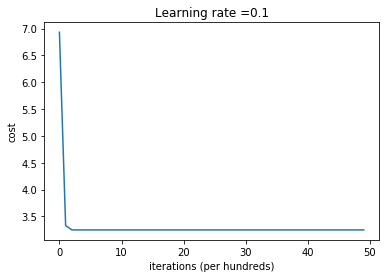

In [6]:
from NeuralNet import NeuralNetwork
classifier = NeuralNetwork([n_x, 64, 32, 16, n_y])
classifier.fit(X_train, Y_train, 0.1, 5000, 200, True)

Cost after iteration 0: 6.926759
Cost after iteration 200: 0.799479
Cost after iteration 400: 0.530801
Cost after iteration 600: 0.439886
Cost after iteration 800: 0.384232
Cost after iteration 1000: 0.343702
Cost after iteration 1200: 0.311870
Cost after iteration 1400: 0.285498
Cost after iteration 1600: 0.263003
Cost after iteration 1800: 0.243463
Cost after iteration 2000: 0.226432
Cost after iteration 2200: 0.211427
Cost after iteration 2400: 0.198095
Cost after iteration 2600: 0.186127
Cost after iteration 2800: 0.175351
Cost after iteration 3000: 0.165590
Cost after iteration 3200: 0.156695
Cost after iteration 3400: 0.148495
Cost after iteration 3600: 0.140879
Cost after iteration 3800: 0.133818
Cost after iteration 4000: 0.127258
Cost after iteration 4200: 0.121138
Cost after iteration 4400: 0.115420
Cost after iteration 4600: 0.110055
Cost after iteration 4800: 0.105012


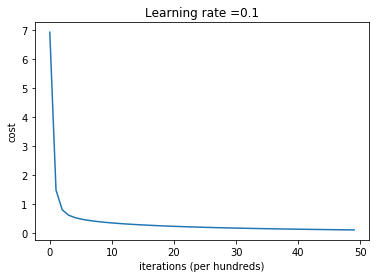

In [7]:
classifier2 = NeuralNetwork([n_x, 100, n_y])
classifier2.fit(X_train, Y_train, 0.1, 5000, 200, True)

Cost after iteration 0: 6.931473
Cost after iteration 200: 3.249771
Cost after iteration 400: 3.249770
Cost after iteration 600: 3.249768
Cost after iteration 800: 3.249766
Cost after iteration 1000: 3.249764
Cost after iteration 1200: 3.249761
Cost after iteration 1400: 3.249758
Cost after iteration 1600: 3.249753
Cost after iteration 1800: 3.249747
Cost after iteration 2000: 3.249738
Cost after iteration 2200: 3.249724
Cost after iteration 2400: 3.249703
Cost after iteration 2600: 3.249665
Cost after iteration 2800: 3.249585
Cost after iteration 3000: 3.249367
Cost after iteration 3200: 3.248295
Cost after iteration 3400: 3.169690
Cost after iteration 3600: 2.666915
Cost after iteration 3800: 2.498405
Cost after iteration 4000: 2.308092
Cost after iteration 4200: 2.046383
Cost after iteration 4400: 1.693445
Cost after iteration 4600: 1.153393
Cost after iteration 4800: 0.740902


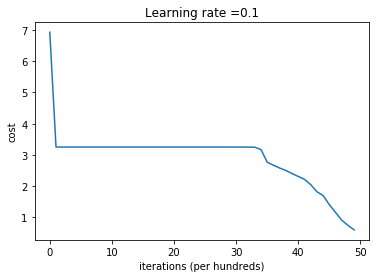

In [8]:
classifier3 = NeuralNetwork([n_x, 16, 32, 64, n_y])
classifier3.fit(X_train, Y_train, 0.1, 5000, 200, True)

(10, 2653)
Predicted:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Actual Value:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Score on Test data: 98.16057293629854%


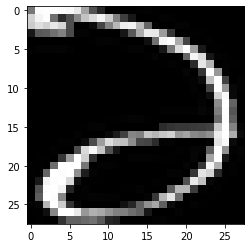

In [16]:
P_test = classifier3.predict(X_test)
P_test = (P_test == np.max(P_test, axis=0)) + np.zeros((10,1))
print(P_test.shape)
index = 31
print("Predicted:")
print(P_test.T[index])
print("Actual Value:")
print(Y_test.T[index])
plt.imshow(X_test.T[index].reshape(28,28), cmap='gray')

accuracy = np.equal(Y_test.T, P_test.T) + 0
score = np.sum(accuracy) / (accuracy.shape[0]*accuracy.shape[1]) * 100
print("Score on Test data: " + str(score) + "%")